# Text Mining Assignment
 
#### Perform sentimental analysis on the Elon-musk tweets

In [1]:
# Importing libraries: 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import itertools
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from wordcloud import WordCloud


In [2]:
tweets = pd.read_csv('Elon_musk.csv',encoding='cp1252')
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [4]:
#Number of Words in single tweet
tweets['word_count'] = tweets['Text'].apply(lambda x: len(str(x).split(" ")))
tweets.head()

,Text,word_count
0,@kunalb11 I’m an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [5]:
#Number of characters in single tweet
tweets['char_count'] = tweets['Text'].str.len() ## this also includes spaces
tweets.head()

,Text,word_count,char_count
0,@kunalb11 I’m an alien,4,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82
2,@joerogan @Spotify Great interview!,4,35
3,@gtera27 Doge is underestimated,4,31
4,@teslacn Congratulations Tesla China for amazi...,17,104


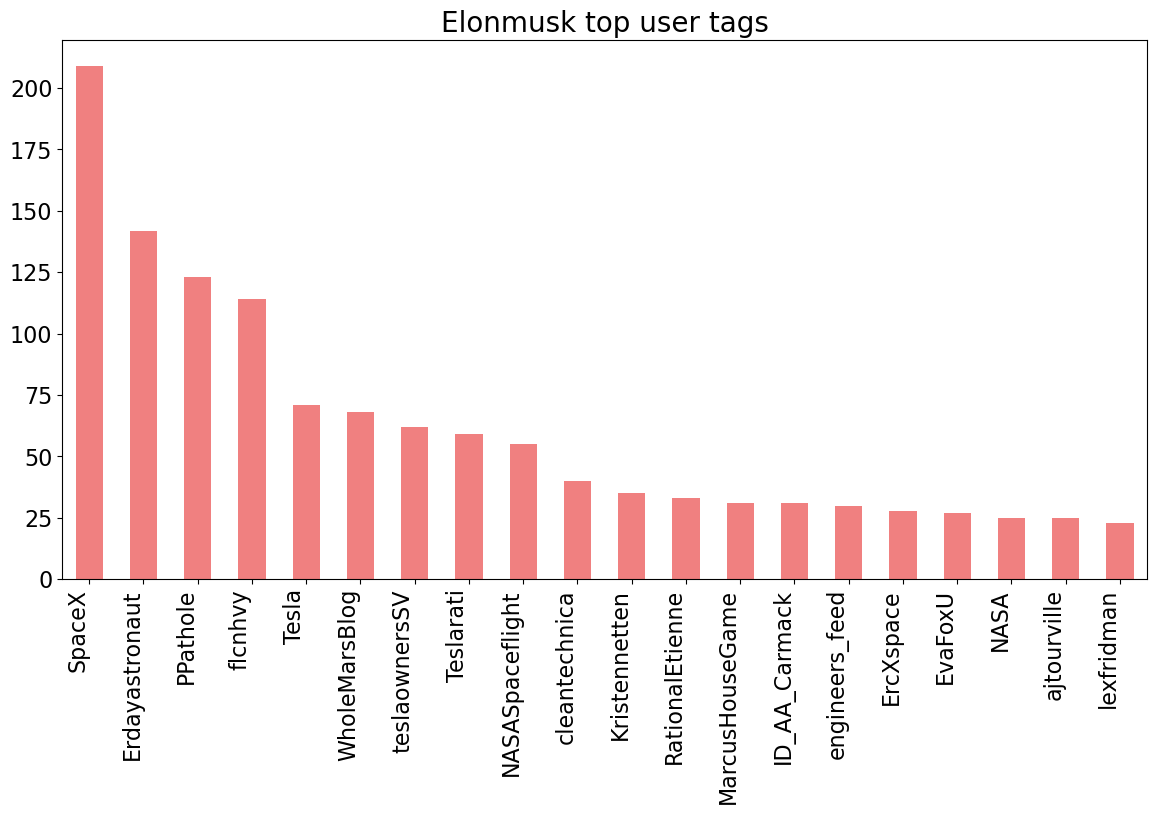

In [6]:
#Elonmusk top user tags:
c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('Elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

#### Pre - Processing:

In [7]:
#Coverting to lower case:
tweets.Text = tweets.Text.apply(lambda x : ' '.join(x.lower() for x in x.split(' ')))
tweets.head()

,Text,word_count,char_count
0,@kunalb11 i’m an alien,4,22
1,@id_aa_carmack ray tracing on cyberpunk with h...,13,82
2,@joerogan @spotify great interview!,4,35
3,@gtera27 doge is underestimated,4,31
4,@teslacn congratulations tesla china for amazi...,17,104


In [8]:
#Removing numerical values: 
tweets.Text = tweets.Text.apply(lambda x : ' '.join(re.sub("[0-9" "]+"," ",x) for x in x.split(' ')))
tweets.head()

,Text,word_count,char_count
0,@kunalb i’m an alien,4,22
1,@id_aa_carmack ray tracing on cyberpunk with h...,13,82
2,@joerogan @spotify great interview!,4,35
3,@gtera doge is underestimated,4,31
4,@teslacn congratulations tesla china for amazi...,17,104


In [9]:
# Removing punctuation:
tweets.Text = tweets.Text.str.replace('[^\w\s]','')
tweets.Text = tweets.Text.str.replace('\n',' ')
tweets.Text = tweets.Text.str.replace('_','')

tweets.head()

,Text,word_count,char_count
0,kunalb im an alien,4,22
1,idaacarmack ray tracing on cyberpunk with hdr ...,13,82
2,joerogan spotify great interview,4,35
3,gtera doge is underestimated,4,31
4,teslacn congratulations tesla china for amazin...,17,104


In [10]:
#importing stopwords from txt file provided:
with open('stop.txt',"r") as file:
    stopwords = file.read()
stopwords = stopwords.split()

In [11]:
# removing Stopwords:
tweets.Text = tweets.Text.apply(lambda x: " ".join(x for x in x.split(' ') if x not in stopwords))
tweets.head()

,Text,word_count,char_count
0,kunalb im alien,4,22
1,idaacarmack ray tracing cyberpunk hdr nextlevel,13,82
2,joerogan spotify great interview,4,35
3,gtera doge underestimated,4,31
4,teslacn congratulations tesla china amazing ex...,17,104


In [12]:
# Common words removal:
freq = pd.Series(' '.join(tweets.Text).split()).value_counts()[:12]

In [13]:
tweets.Text = tweets.Text.apply(lambda x: " ".join(x for x in x.split(' ') if x not in freq))
tweets.head()

,Text,word_count,char_count
0,kunalb im alien,4,22
1,idaacarmack ray tracing cyberpunk hdr nextlevel,13,82
2,joerogan spotify interview,4,35
3,gtera doge underestimated,4,31
4,teslacn congratulations china amazing executio...,17,104


In [14]:
# rare words removal:
freq = pd.Series(' '.join(tweets.Text).split()).value_counts()[-50:]

In [15]:
tweets.Text = tweets.Text.apply(lambda x: " ".join(x for x in x.split(' ') if x not in freq))
tweets.head()

,Text,word_count,char_count
0,kunalb im alien,4,22
1,idaacarmack ray tracing cyberpunk hdr nextlevel,13,82
2,joerogan spotify interview,4,35
3,gtera doge underestimated,4,31
4,teslacn congratulations china amazing executio...,17,104


In [17]:
# Stemming:
st = PorterStemmer()
tweets['Text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
tweets.head()

,Text,word_count,char_count
0,kunalb im alien,4,22
1,idaacarmack ray tracing cyberpunk hdr nextlevel,13,82
2,joerogan spotify interview,4,35
3,gtera doge underestimated,4,31
4,teslacn congratulations china amazing executio...,17,104


In [18]:
#let's check frequency of each word:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweets["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.tail()

,term,occurrences,frequency
5244,zwiebelbach,1,0.000087
5245,zxd,1,0.000087
5246,zz,3,0.000262
5247,zzcool,1,0.000087
5248,ðogecoin,1,0.000087


In [19]:
#Term Frequency – Inverse Document Frequency (TF-IDF):
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,ab,abort,absolutely,access,accurate,actual,adamklotz,add,adding,advanced,...,year,years,yesterdays,yo,youre,yourfavgas,yup,zainraz,zone,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.367523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### N-gram:

#### Bi-gram:

In [20]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) 
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [21]:
top2_words = get_top_n2_words(tweets["Text"], n=200)# top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,giga berlin,11
1,astrobehnken astrodoug,10
2,falcon stage,9
3,starship sn,8
4,static fire,8
5,crew dragon,8
6,thesheetztweetz waemd,8
7,jgrano teslaratiteam,8
8,falcon launch,7
9,marcushousegame felixschlang,7


#### Tri-gram:

In [22]:
def get_top_n3_words(corpus, n=None):
    vec2 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus) 
    bag_of_words = vec2.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec2.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [23]:
top3_words = get_top_n3_words(tweets["Text"], n=200)# top 200
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,thesheetztweetz waemd spacexstarlink,7
1,falcon stage landed,6
2,ercxspace marcushousegame felixschlang,6
3,waemd spacexstarlink wanationalguard,6
4,neopork casparstanley ercxspace,5
5,casparstanley ercxspace marcushousegame,5
6,tjcooney lrocket felixschlang,4
7,lrocket felixschlang marcushousegame,4
8,landed love droneship,4
9,mirojurcevic tashaark spacestation,4


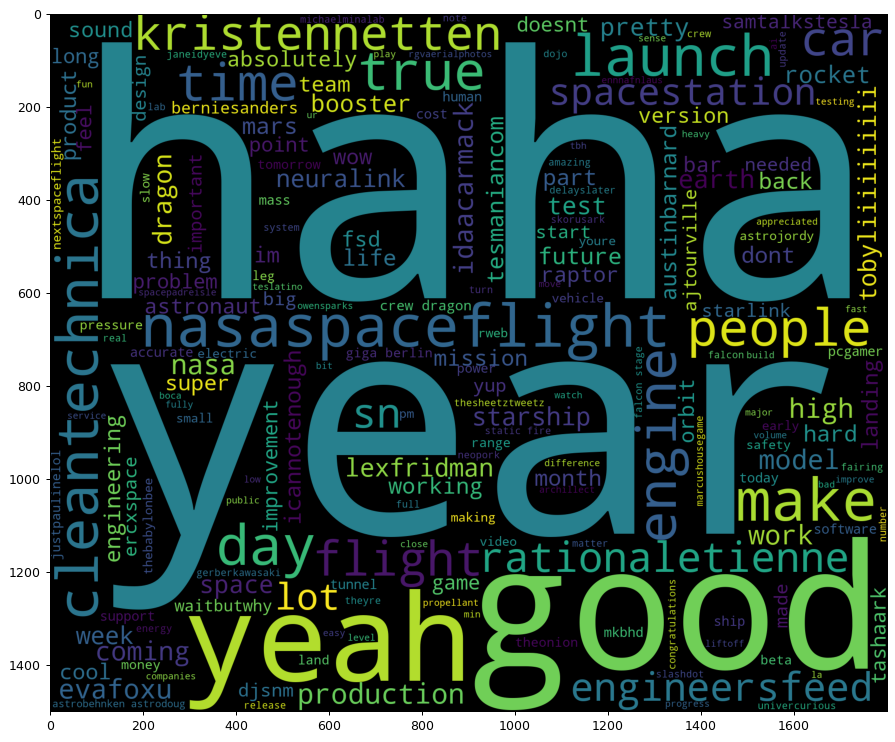

In [24]:
#wordcloud for entire corpus

string_Total = " ".join(tweets["Text"])

plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw)

In [25]:

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity to df:
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head()

,Text,word_count,char_count,subjectivity,polarity
0,kunalb im alien,4,22,0.75,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextlevel,13,82,0.00,0.00
2,joerogan spotify interview,4,35,0.00,0.00
3,gtera doge underestimated,4,31,0.00,0.00
4,teslacn congratulations china amazing executio...,17,104,0.90,0.60


In [26]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [27]:
tweets.head()

,Text,word_count,char_count,subjectivity,polarity,analysis
0,kunalb im alien,4,22,0.75,-0.25,Negative
1,idaacarmack ray tracing cyberpunk hdr nextlevel,13,82,0.00,0.00,Neutral
2,joerogan spotify interview,4,35,0.00,0.00,Neutral
3,gtera doge underestimated,4,31,0.00,0.00,Neutral
4,teslacn congratulations china amazing executio...,17,104,0.90,0.60,Positive


In [28]:
# fetch_sentiment_using_textblob: 
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'


In [29]:
# Overall sentiment of Elon's tweets:
string_Total = " ".join(tweets["Text"])

fetch_sentiment_using_textblob(string_Total)

'pos'

In [30]:
sum(tweets.polarity)

132.7580357142855

#### Since the sum of polarity of all of Elon's tweets are positive, we can conclude that his sentiments are positive.